In [146]:
#Import all the packages
from bs4 import BeautifulSoup 
import requests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math

In [2]:
response = requests.get(
  url='https://proxy.scrapeops.io/v1/',
  params={
      'api_key': 'f0bc7a4a-7152-4771-a0b4-ffb23be04f56',
      'url': 'https://www.rent.com/zip-35806-apartments/1-bedroom', 
  },
)

In [3]:
print('Response Body: ', response.content)

Response Body:  b'<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><script id="tracker-init" type="application/javascript">var rentpathEventBus=function(){"use strict";var t={},s={},e=0;function n(n,i){var c=e++;return t[n]||(t[n]={}),t[n][c]=i,s[n]&&i(),{unsubscribe:function(){delete t[n][c],0===Object.keys(t[n]).length&&delete t[n]}}}function i(e,d){s[e]=!0,t[e]&&Object.keys(t[e]).forEach((function(s){return t[e][s](d)}))}return window.rentpathEventBus={subscriptions:t,dispatchedSubscriptions:s,dispatch:i,subscribe:n},{subscriptions:t,dispatchedSubscriptions:s,dispatch:i,subscribe:n}}();</script><script id="ramp">window.ramp = {\n          passiveMode: true,\n          que: [],\n          forcePath: \'undefined\',\n          onReady: () => {\n            try {\n              ramp.destroyUnits(\'all\')\n            } catch(e) {\n              console.error(\'destroyUnits error: \', e)\n            }\n              ramp.addUnits(window.__AD_UNITS__ || []).then(() => {\n     

In [6]:
soup = BeautifulSoup(response.content, "lxml")
print(soup)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><script id="tracker-init" type="application/javascript">var rentpathEventBus=function(){"use strict";var t={},s={},e=0;function n(n,i){var c=e++;return t[n]||(t[n]={}),t[n][c]=i,s[n]&&i(),{unsubscribe:function(){delete t[n][c],0===Object.keys(t[n]).length&&delete t[n]}}}function i(e,d){s[e]=!0,t[e]&&Object.keys(t[e]).forEach((function(s){return t[e][s](d)}))}return window.rentpathEventBus={subscriptions:t,dispatchedSubscriptions:s,dispatch:i,subscribe:n},{subscriptions:t,dispatchedSubscriptions:s,dispatch:i,subscribe:n}}();</script><script id="ramp">window.ramp = {
          passiveMode: true,
          que: [],
          forcePath: 'undefined',
          onReady: () => {
            try {
              ramp.destroyUnits('all')
            } catch(e) {
              console.error('destroyUnits error: ', e)
            }
              ramp.addUnits(window.__AD_UNITS__ || []).then(() => {
              ramp.displayUnits()
     

In [9]:
listingName=[]
for tag in soup.find_all('div',class_="listing-card_middle__tGKuZ"):
    for tag2 in tag.find_all('p', class_="listing-card_name__5ueE5 truncate_truncate__OYwGo"):
        listingName.append(tag2.get_text(strip=True))

In [73]:
listingAva=[]
for tag in soup.find_all('div',class_="listing-card_bottom__w6dMD"):
    if tag.get_text(strip=True)=='Details':
        listingAva.append(None)
    else:
        listingAva.append(tag.get_text(strip=True))

In [59]:
listingDetail=[]
for tag in soup.find_all('div',class_="listing-card_panel__ojKJL"):
    detail=[]
    for tag2 in tag.find_all('div', class_=False):
        for tag3 in tag2.find_all('p',class_=False):
            if 'Dogs' in tag3.get_text(strip=True):
                pass
            elif "Floor Plan" in tag3.get_text(strip=True):
                pass
            elif tag3.get_text(strip=True)=='Contact for Price':
                detail.append(None)
            else:
                detail.append(tag3.get_text(strip=True))
    if len(detail)<2:
        detail.append(None)
    listingDetail.append(detail)

In [60]:
listingDetail

[[None, '850 Sqft'],
 ['$1,025-$2,828', '788-922 Sqft'],
 ['$1,294-$1,835', '642-1,104 Sqft'],
 ['$1,356-$1,491', '653-942 Sqft'],
 [None, '540 Sqft'],
 ['$1,159', '758-940 Sqft'],
 ['$815-$1,494', '653-829 Sqft'],
 ['$1,100', None],
 ['$1,039-$1,189', '630-957 Sqft'],
 [None, '750 Sqft'],
 ['$1,075-$1,165', '820-896 Sqft'],
 ['$1,083-$2,803', '783-797 Sqft'],
 ['$1,800', '800 Sqft'],
 ['$950', None]]

In [79]:
for i in listingDetail:
    if i[0]!=None:
        price_range=i[0].replace('$', '').replace(',', '')
        if '-' in price_range:
            lower_price, upper_price = price_range.split('-')
            i[0]=(float(lower_price) + float(upper_price)) / 2
        else:
            i[0]=float(price_range)
    if i[1]!=None:
        area_range=i[1].replace(' Sqft', '').replace(',','')
        if '-' in area_range:
            lower_area, upper_area = area_range.split('-')
            i[1]=(float(lower_area) + float(upper_area)) / 2
        else:
            i[1]=float(area_range)
# The Website only provides the range of area and price instead of giving the specific area and price for each unit.
# For estimation, taking the average of both.

In [80]:
listingDetail

[[None, 850.0],
 [1926.5, 855.0],
 [1564.5, 873.0],
 [1423.5, 797.5],
 [None, 540.0],
 [1159.0, 849.0],
 [1154.5, 741.0],
 [1100.0, None],
 [1114.0, 793.5],
 [None, 750.0],
 [1120.0, 858.0],
 [1943.0, 790.0],
 [1800.0, 800.0],
 [950.0, None]]

In [93]:
bed1=pd.DataFrame({
    'listing_type': '1-bed', 
    'Name': listingName, 
    'Available Units': listingAva, 
    'Price': [d[0] for d in listingDetail], 
    'Area':[d[1] for d in listingDetail],
})

In [94]:
bed1

listing_type                            Name           Available Units  \
0         1-bed                 Madison Gardens                      None   
1         1-bed          Main Street Apartments   1 Unit AvailableDetails   
2         1-bed             Laurel at Dry Creek  8 Units AvailableDetails   
3         1-bed           Mosby at Bridgestreet  7 Units AvailableDetails   
4         1-bed           Willow Run Apartments                      None   
5         1-bed                 Highland Pointe   1 Unit AvailableDetails   
6         1-bed      Brixworth at Bridge Street                      None   
7         1-bed                 201 Pumprock Dr   1 Unit AvailableDetails   
8         1-bed                   Emerald Ridge                      None   
9         1-bed                     Royal Pines                      None   
10        1-bed                    Addison Park  3 Units AvailableDetails   
11        1-bed  The Paddock Club at Providence                      None   
12        1-bed            85 Town Center Dr NW   1 Unit AvailableDetails   
13        1-bed                 201 Pumprock Dr   1 Unit AvailableDetails   

     Price   Area  
0      NaN  850.0  
1   1926.5  855.0  
2   1564.5  873.0  
3   1423.5  797.5  
4      NaN  540.0  
5   1159.0  849.0  
6   1154.5  741.0  
7   1100.0    NaN  
8   1114.0  793.5  
9      NaN  750.0  
10  1120.0  858.0  
11  1943.0  790.0  
12  1800.0  800.0  
13   950.0    NaN

## Repeat the same process for 2-bed and 3-bed rental properties

In [86]:
response2 = requests.get(
  url='https://proxy.scrapeops.io/v1/',
  params={
      'api_key': 'f0bc7a4a-7152-4771-a0b4-ffb23be04f56',
      'url': 'https://www.rent.com/zip-35806-apartments/2-bedroom', 
  },
)

soup2 = BeautifulSoup(response2.content, "lxml")

listingName2=[]
for tag in soup2.find_all('div',class_="listing-card_middle__tGKuZ"):
    for tag2 in tag.find_all('p', class_="listing-card_name__5ueE5 truncate_truncate__OYwGo"):
        listingName2.append(tag2.get_text(strip=True))

listingAva2=[]
for tag in soup2.find_all('div',class_="listing-card_bottom__w6dMD"):
    if tag.get_text(strip=True)=='Details':
        listingAva2.append(None)
    else:
        listingAva2.append(tag.get_text(strip=True))

listingDetail2=[]
for tag in soup2.find_all('div',class_="listing-card_panel__ojKJL"):
    detail=[]
    for tag2 in tag.find_all('div', class_=False):
        for tag3 in tag2.find_all('p',class_=False):
            if 'Dogs' in tag3.get_text(strip=True):
                pass
            elif "Floor Plan" in tag3.get_text(strip=True):
                pass
            elif tag3.get_text(strip=True)=='Contact for Price':
                detail.append(None)
            else:
                detail.append(tag3.get_text(strip=True))
    if len(detail)<2:
        detail.append(None)
    listingDetail2.append(detail)
    
for i in listingDetail2:
    if i[0]!=None:
        price_range=i[0].replace('$', '').replace(',', '')
        if '-' in price_range:
            lower_price, upper_price = price_range.split('-')
            i[0]=(float(lower_price) + float(upper_price)) / 2
        else:
            i[0]=float(price_range)
    if i[1]!=None:
        area_range=i[1].replace(' Sqft', '').replace(',','')
        if '-' in area_range:
            lower_area, upper_area = area_range.split('-')
            i[1]=(float(lower_area) + float(upper_area)) / 2
        else:
            i[1]=float(area_range)
            
bed2=pd.DataFrame({
    'listing_type': '2-bed', 
    'Name': listingName2, 
    'Available Units': listingAva2, 
    'Price': [d[0] for d in listingDetail2], 
    'Area':[d[1] for d in listingDetail2],
})

In [87]:
bed2

listing_type                            Name            Available Units  \
0         2-bed                   Emerald Ridge    1 Unit AvailableDetails   
1         2-bed          Main Street Apartments   2 Units AvailableDetails   
2         2-bed             Laurel at Dry Creek   3 Units AvailableDetails   
3         2-bed                    Addison Park   4 Units AvailableDetails   
4         2-bed                 Highland Pointe                       None   
5         2-bed  The Paddock Club at Providence    1 Unit AvailableDetails   
6         2-bed          32 Hillcrest Ave NW #A                       None   
7         2-bed                 Madison Gardens                       None   
8         2-bed                     Royal Pines                       None   
9         2-bed           Mosby at Bridgestreet  10 Units AvailableDetails   
10        2-bed      Brixworth at Bridge Street                       None   

     Price    Area  
0   1329.0  1216.0  
1   1823.5  1058.0  
2   1572.0  1162.5  
3   1257.0  1178.0  
4      NaN  1215.0  
5   2473.0  1148.0  
6   2200.0   850.0  
7      NaN  1075.0  
8      NaN  1004.5  
9   1651.5  1167.5  
10  1359.5  1079.5

In [88]:
response3 = requests.get(
  url='https://proxy.scrapeops.io/v1/',
  params={
      'api_key': 'f0bc7a4a-7152-4771-a0b4-ffb23be04f56',
      'url': 'https://www.rent.com/zip-35806-apartments/3-bedroom', 
  },
)

soup3 = BeautifulSoup(response3.content, "lxml")

listingName3=[]
for tag in soup3.find_all('div',class_="listing-card_middle__tGKuZ"):
    for tag2 in tag.find_all('p', class_="listing-card_name__5ueE5 truncate_truncate__OYwGo"):
        listingName3.append(tag2.get_text(strip=True))

listingAva3=[]
for tag in soup3.find_all('div',class_="listing-card_bottom__w6dMD"):
    if tag.get_text(strip=True)=='Details':
        listingAva3.append(None)
    else:
        listingAva3.append(tag.get_text(strip=True))

listingDetail3=[]
for tag in soup3.find_all('div',class_="listing-card_panel__ojKJL"):
    detail=[]
    for tag2 in tag.find_all('div', class_=False):
        for tag3 in tag2.find_all('p',class_=False):
            if 'Dogs' in tag3.get_text(strip=True):
                pass
            elif "Floor Plan" in tag3.get_text(strip=True):
                pass
            elif tag3.get_text(strip=True)=='Contact for Price':
                detail.append(None)
            else:
                detail.append(tag3.get_text(strip=True))
    if len(detail)<2:
        detail.append(None)
    listingDetail3.append(detail)
    
for i in listingDetail3:
    if i[0]!=None:
        price_range=i[0].replace('$', '').replace(',', '')
        if '-' in price_range:
            lower_price, upper_price = price_range.split('-')
            i[0]=(float(lower_price) + float(upper_price)) / 2
        else:
            i[0]=float(price_range)
    if i[1]!=None:
        area_range=i[1].replace(' Sqft', '').replace(',','')
        if '-' in area_range:
            lower_area, upper_area = area_range.split('-')
            i[1]=(float(lower_area) + float(upper_area)) / 2
        else:
            i[1]=float(area_range)
            
bed3=pd.DataFrame({
    'listing_type': '3-bed', 
    'Name': listingName3, 
    'Available Units': listingAva3, 
    'Price': [d[0] for d in listingDetail3], 
    'Area':[d[1] for d in listingDetail3],
})

In [89]:
bed3

listing_type                            Name           Available Units  \
0         3-bed                   Emerald Ridge                      None   
1         3-bed          Main Street Apartments  5 Units AvailableDetails   
2         3-bed                    Addison Park   1 Unit AvailableDetails   
3         3-bed           Mosby at Bridgestreet  3 Units AvailableDetails   
4         3-bed  The Paddock Club at Providence   1 Unit AvailableDetails   
5         3-bed                6510 Sheri Dr NW                      None   
6         3-bed                317 Dovington Dr                      None   
7         3-bed               18 Cranston St NW                      None   
8         3-bed                 Madison Gardens                      None   
9         3-bed             Laurel at Dry Creek  6 Units AvailableDetails   
10        3-bed                 Highland Pointe                      None   
11        3-bed               503 Jeffery Dr NW                      None   
12        3-bed                   6 Stockton St                      None   

     Price    Area  
0   1539.0  1421.0  
1   2528.5  1206.0  
2   1507.5  1424.0  
3   1971.5  1473.0  
4   2765.5  1335.5  
5   1950.0  2029.0  
6   1650.0  1645.0  
7   2725.0  2113.0  
8      NaN  1280.0  
9   2084.5  1742.5  
10     NaN  1527.5  
11  1600.0  1061.0  
12  2700.0  2096.0

## Till now, we've done the web scraping process and collected all the raw data from rent.com. After double-checking the websites manully, the data-collection process has been done successfully with no any major issue.

In [116]:
bed=pd.concat([bed1,bed2,bed3],ignore_index=True)

In [118]:
#Compute the new column, which is the average price per sqft
bed['Average $/sqft']=bed['Price']/bed['Area']
#Converge the other columns to numerical values for future analysis
bed['listing_type']=[int(i[0])for i in bed['listing_type']]
units=[]
for i in bed['Available Units']:
    if i!= None:
        units.append(int(i[0]))
    else:
        units.append(None)
bed['Available Units']=units
bed

listing_type                            Name  Available Units   Price  \
0              1                 Madison Gardens              NaN     NaN   
1              1          Main Street Apartments              1.0  1926.5   
2              1             Laurel at Dry Creek              8.0  1564.5   
3              1           Mosby at Bridgestreet              7.0  1423.5   
4              1           Willow Run Apartments              NaN     NaN   
5              1                 Highland Pointe              1.0  1159.0   
6              1      Brixworth at Bridge Street              NaN  1154.5   
7              1                 201 Pumprock Dr              1.0  1100.0   
8              1                   Emerald Ridge              NaN  1114.0   
9              1                     Royal Pines              NaN     NaN   
10             1                    Addison Park              3.0  1120.0   
11             1  The Paddock Club at Providence              NaN  1943.0   
12             1            85 Town Center Dr NW              1.0  1800.0   
13             1                 201 Pumprock Dr              1.0   950.0   
14             2                   Emerald Ridge              1.0  1329.0   
15             2          Main Street Apartments              2.0  1823.5   
16             2             Laurel at Dry Creek              3.0  1572.0   
17             2                    Addison Park              4.0  1257.0   
18             2                 Highland Pointe              NaN     NaN   
19             2  The Paddock Club at Providence              1.0  2473.0   
20             2          32 Hillcrest Ave NW #A              NaN  2200.0   
21             2                 Madison Gardens              NaN     NaN   
22             2                     Royal Pines              NaN     NaN   
23             2           Mosby at Bridgestreet              1.0  1651.5   
24             2      Brixworth at Bridge Street              NaN  1359.5   
25             3                   Emerald Ridge              NaN  1539.0   
26             3          Main Street Apartments              5.0  2528.5   
27             3                    Addison Park              1.0  1507.5   
28             3           Mosby at Bridgestreet              3.0  1971.5   
29             3  The Paddock Club at Providence              1.0  2765.5   
30             3                6510 Sheri Dr NW              NaN  1950.0   
31             3                317 Dovington Dr              NaN  1650.0   
32             3               18 Cranston St NW              NaN  2725.0   
33             3                 Madison Gardens              NaN     NaN   
34             3             Laurel at Dry Creek              6.0  2084.5   
35             3                 Highland Pointe              NaN     NaN   
36             3               503 Jeffery Dr NW              NaN  1600.0   
37             3                   6 Stockton St              NaN  2700.0   

      Area  Average $/sqft  
0    850.0             NaN  
1    855.0        2.253216  
2    873.0        1.792096  
3    797.5        1.784953  
4    540.0             NaN  
5    849.0        1.365135  
6    741.0        1.558030  
7      NaN             NaN  
8    793.5        1.403907  
9    750.0             NaN  
10   858.0        1.305361  
11   790.0        2.459494  
12   800.0        2.250000  
13     NaN             NaN  
14  1216.0        1.092928  
15  1058.0        1.723535  
16  1162.5        1.352258  
17  1178.0        1.067063  
18  1215.0             NaN  
19  1148.0        2.154181  
20   850.0        2.588235  
21  1075.0             NaN  
22  1004.5             NaN  
23  1167.5        1.414561  
24  1079.5        1.259379  
25  1421.0        1.083040  
26  1206.0        2.096600  
27  1424.0        1.058638  
28  1473.0        1.338425  
29  1335.5        2.070760  
30  2029.0        0.961065  
31  1645.0        1.003040  
32  2113.0        1.289636  
33  1280.0    

## Generate Descriptive Analysis and Correlation Analysis through ydata_profiling

In [119]:
from pandas_profiling import ProfileReport

In [120]:
bed_report=ProfileReport(bed,title='Rental Data 35806')
bed_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [121]:
#Save the report
bed_report.to_file("RentalData35806.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## As for the current rental price, although the report shows that there are a considerable percentage of missing data, these missing values won't be taken into account since we should only consider the rental properties that are available for us to lease.

#### Nevertheless, there are only 38 avaliable data observations found on rent.com, the source data is too small to build any complicated model. Plus building a regression model based on data with such quality will definitely produce an expensive error. Considering the limited amount of raw data obtained and the poor quality of these data, the estimation of rental price in current market will be simply computed based on descriptive analysis.

In [151]:
#Rental Price for 1-bed rental properties in zip code 35806 area
Pr=[0,0,0]
Un=[0,0,0]
for index, r in bed.iterrows():
    if r['listing_type']==1:
        if not math.isnan(r['Available Units']) and not math.isnan(r['Average $/sqft']):
            Pr[0]+=r['Average $/sqft']*r['Available Units']
            Un[0]+=r['Available Units']
    if r['listing_type']==2:
        if not math.isnan(r['Available Units']) and not math.isnan(r['Average $/sqft']):
            Pr[1]+=r['Average $/sqft']*r['Available Units']
            Un[1]+=r['Available Units']
    if r['listing_type']==3:
        if not math.isnan(r['Available Units']) and not math.isnan(r['Average $/sqft']):
            Pr[2]+=r['Average $/sqft']*r['Available Units']
            Un[2]+=r['Available Units']
RP_average=[i/j for i,j in zip(Pr,Un)]

In [152]:
RP_average

[1.7436131595082263, 1.3694804378556216, 1.550330789206396]

## Next, prediction for the future markets

#### Again, the data provided by rent.com is lack of quality and quantity. It's impossible to build contextual time-based analysis using data like that. To solve this problem, I searched for rent data over the past few years in the greater Huntsville area. I'll manage to use these data to generate a time series forecasting model and use this model to predict the rental price in zip code 35806. 
(Data Source:https://www.deptofnumbers.com/rent/alabama/huntsville/)

In [161]:
H_Rental=pd.DataFrame({
    'Date':[2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009],
    'US Median':[1097,1077,1043,1027,1017,986,953,940,941,955,960],
    'Alabama Median':[807,802,773,778,773,757,731,733,742,745,749],
    'Huntsville Median':[858,849,808,822,804,758,763,755,751,770,770],
    'Huntsville Average':[866,798,810,776,786,770,793,789,778,767,762]
})

In [158]:
from statsmodels.tsa.arima.model import ARIMA

In [162]:
H_Rental['Date'] = pd.to_datetime(H_Rental['Date'], format='%Y')
H_Rental = H_Rental.set_index('Date')

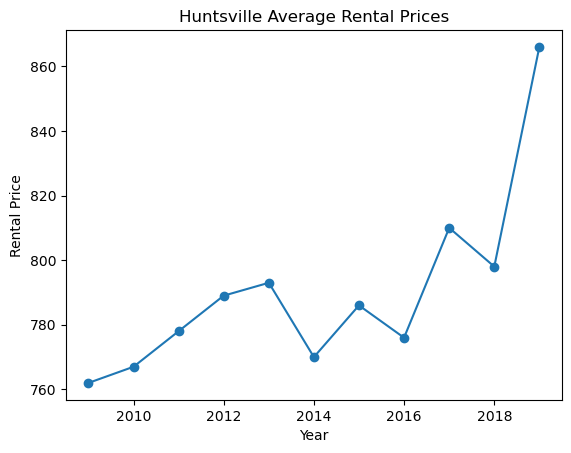

In [169]:
plt.plot(H_Rental.index, H_Rental['Huntsville Average'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rental Price')
plt.title('Huntsville Average Rental Prices')
plt.show()

In [171]:
model = ARIMA(H_Rental['Huntsville Average'], order=(1,1,0))
model_fit = model.fit()

# Predict rental prices for 2023 and 2025
future_dates = pd.Index(range(2023, 2026), name='Date')
forecast = model_fit.get_forecast(steps=3)

# Extract the predicted values
forecast_values = forecast.predicted_mean
forecast_values.index = future_dates

print(forecast_values)

Date
2023    765.003955
2024    763.199206
2025    764.283483
Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency informa

### By the ARIMA model's prediction, the average housing price in Huntsville in 2025 will be 764.283483, decreasing from 765.003955 in 2023.
* Let's assume that the rental price in zip code 35806 will fluctuate with the average housing price in the greater Huntsville area.

In [174]:
# Therefore, the resulted prediction for the rental price in zip code 35806 area in 2025 will be
RP_25=[i*(764.283483/765.003955) for i in RP_average]
RP_25

[1.741971044520393, 1.368190676798082, 1.5488707053505406]